# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           1.52e-06
Time:                        22:53:16   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

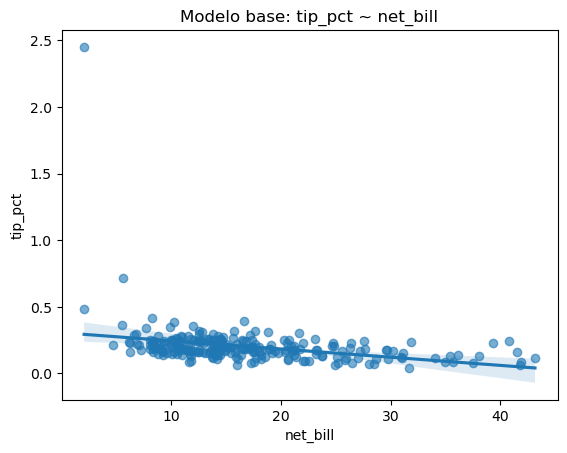

In [7]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar base tips
tips = sns.load_dataset('tips')

# Criar variável net_bill
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Percentual de gorjeta
tips['tip_pct'] = tips['tip'] / tips['net_bill']

# Modelo base
modelo_base = smf.ols('tip_pct ~ net_bill', data=tips).fit()
print(modelo_base.summary())

# Gráfico
sns.regplot(x='net_bill', y='tip_pct', data=tips, scatter_kws={'alpha':0.6})
plt.title('Modelo base: tip_pct ~ net_bill')
plt.show()


### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           1.62e-13
Time:                        22:54:18   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

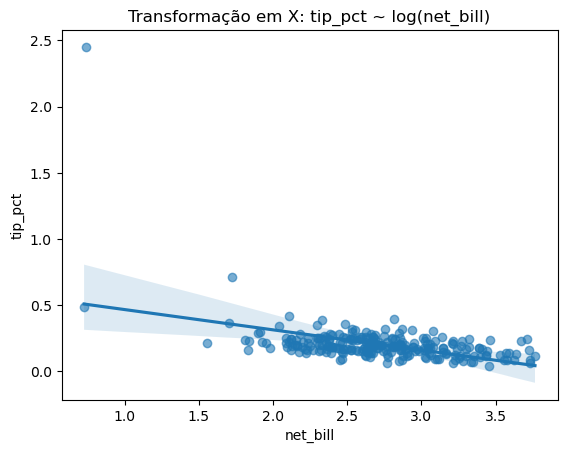

In [9]:
# Transformação em X (log de net_bill)
modelo_logx = smf.ols('tip_pct ~ np.log(net_bill)', data=tips).fit()
print(modelo_logx.summary())

#Gráfico
sns.regplot(x=np.log(tips['net_bill']), y=tips['tip_pct'], scatter_kws={'alpha':0.6})
plt.title('Transformação em X: tip_pct ~ log(net_bill)')
plt.show()


###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           1.06e-09
Time:                        22:58:59   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4851      0.047  

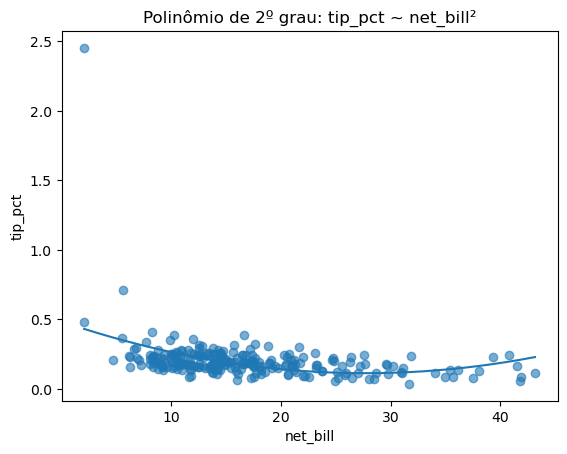

In [13]:
modelo_poly = smf.ols('tip_pct ~ net_bill + I(net_bill**2)', data=tips).fit()
print(modelo_poly.summary())

# Gera uma malha de X e calcula a curva prevista usando .predict()
x_grid = pd.DataFrame({
    'net_bill': np.linspace(tips['net_bill'].min(), tips['net_bill'].max(), 200)
})
y_grid = modelo_poly.predict(x_grid)  # o termo I(net_bill**2) é tratado pela fórmula

# Gráfico
plt.scatter(tips['net_bill'], tips['tip_pct'], alpha=0.6)
plt.plot(x_grid['net_bill'], y_grid)
plt.title('Polinômio de 2º grau: tip_pct ~ net_bill²')
plt.xlabel('net_bill'); plt.ylabel('tip_pct')
plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           8.27e-16
Time:                        22:57:15   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

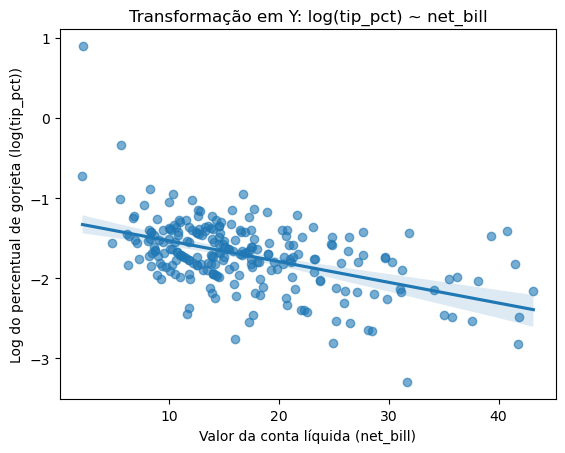

In [12]:
# Evitar erro de log(0)
tips = tips[tips['tip_pct'] > 0].copy()

# Modelo com log em Y
modelo_logy = smf.ols('np.log(tip_pct) ~ net_bill', data=tips).fit()
print(modelo_logy.summary())

# Gráfico do modelo
sns.regplot(x='net_bill', y=np.log(tips['tip_pct']), data=tips, scatter_kws={'alpha':0.6})
plt.title('Transformação em Y: log(tip_pct) ~ net_bill')
plt.xlabel('Valor da conta líquida (net_bill)')
plt.ylabel('Log do percentual de gorjeta (log(tip_pct))')
plt.show()

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           5.20e-20
Time:                        23:00:21   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

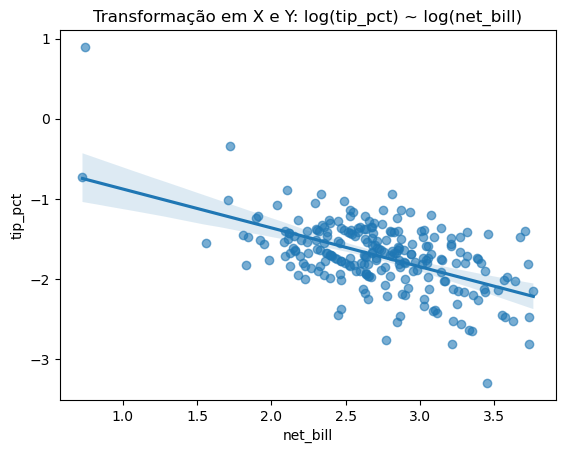

In [15]:
# Transformação em X e Y
modelo_logxy = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data=tips).fit()
print(modelo_logxy.summary())

#Gráfico
sns.regplot(x=np.log(tips['net_bill']), y=np.log(tips['tip_pct']), scatter_kws={'alpha':0.6})
plt.title('Transformação em X e Y: log(tip_pct) ~ log(net_bill)')
plt.show()

###  6. qual modelo resultou no melhor ajuste?

O modelo que apresentou o melhor ajuste foi o modelo 5, que aplica logaritmo em X e Y (log(tip_pct) ~ log(net_bill)), pois obteve o maior valor de R² (0,293). Isso significa que ele explica melhor a variação do percentual de gorjeta em relação ao valor da conta líquida. Comparando com os demais, houve uma melhora progressiva do ajuste à medida que aplicamos as transformações, sendo o modelo base o pior (R² = 0,091) e o polinomial e log em Y intermediários. Assim, o modelo log-log foi o mais eficiente por linearizar a relação e reduzir a dispersão dos dados, representando de forma mais adequada o comportamento real entre as variáveis.